<a href="https://colab.research.google.com/github/Hadiqapieas/Leukemia-Data-classification/blob/ResNet34/ResNet34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import os
import shutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
!unzip Original.zip

Archive:  Original.zip
   creating: Pro/
  inflating: Pro/WBC-Malignant-Pro-001.jpg  
  inflating: Pro/WBC-Malignant-Pro-002.jpg  
  inflating: Pro/WBC-Malignant-Pro-003.jpg  
  inflating: Pro/WBC-Malignant-Pro-004.jpg  
  inflating: Pro/WBC-Malignant-Pro-005.jpg  
  inflating: Pro/WBC-Malignant-Pro-006.jpg  
  inflating: Pro/WBC-Malignant-Pro-007.jpg  
  inflating: Pro/WBC-Malignant-Pro-008.jpg  
  inflating: Pro/WBC-Malignant-Pro-009.jpg  
  inflating: Pro/WBC-Malignant-Pro-010.jpg  
  inflating: Pro/WBC-Malignant-Pro-011.jpg  
  inflating: Pro/WBC-Malignant-Pro-012.jpg  
  inflating: Pro/WBC-Malignant-Pro-013.jpg  
  inflating: Pro/WBC-Malignant-Pro-014.jpg  
  inflating: Pro/WBC-Malignant-Pro-015.jpg  
  inflating: Pro/WBC-Malignant-Pro-016.jpg  
  inflating: Pro/WBC-Malignant-Pro-017.jpg  
  inflating: Pro/WBC-Malignant-Pro-018.jpg  
  inflating: Pro/WBC-Malignant-Pro-019.jpg  
  inflating: Pro/WBC-Malignant-Pro-020.jpg  
  inflating: Pro/WBC-Malignant-Pro-021.jpg  
  inflating: P

In [6]:
#Organizing Images into Benign and Malignant Folders
# Defining paths to dataset directories
dataset_dir = 'Original'
benign_dir = os.path.join(dataset_dir, 'Benign')
malignant_dir = os.path.join(dataset_dir, 'Malignant')

# Creating the malignant directory if it doesn't exist
if not os.path.exists(malignant_dir):
    os.makedirs(malignant_dir)

# Moving images from early, pre, and pro directories to malignant directory
for stage in ['Early', 'Pre', 'Pro']:
    stage_dir = os.path.join(dataset_dir, stage)
    if os.path.exists(stage_dir):
        for img_file in os.listdir(stage_dir):
            img_path = os.path.join(stage_dir, img_file)
            shutil.move(img_path, malignant_dir)
        os.rmdir(stage_dir)  # Remove the empty directory

In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths to your dataset directories
dataset_dir = '/content'
benign_dir = os.path.join(dataset_dir, 'Benign')
malignant_dir = os.path.join(dataset_dir, 'Malignant')  # Create this directory if it doesn't exist

# Create the malignant directory if it doesn't exist
if not os.path.exists(malignant_dir):
    os.makedirs(malignant_dir)

# Define paths for stages that need to be moved to Malignant
stages = ['Early', 'Pre', 'Pro']

# Move images from early, pre, and pro directories to malignant directory
for stage in stages:
    stage_dir = os.path.join(dataset_dir, stage)
    if os.path.exists(stage_dir):
        for img_file in os.listdir(stage_dir):
            img_path = os.path.join(stage_dir, img_file)
            shutil.move(img_path, malignant_dir)
        os.rmdir(stage_dir)  # Remove the empty directory
    else:
        print(f"Directory {stage_dir} does not exist.")
        # List contents of the 'content' directory
!ls /content
# List files in Benign and Malignant directories
!ls /content/Benign
!ls /Original/Malignant

# Define paths for new dataset splits
train_dir = '/content/train_dataset'
val_dir = '/content/validation_dataset'
test_dir = '/content/test_dataset'

# Create directories for dataset splits
for directory in [train_dir, val_dir, test_dir]:
    os.makedirs(directory, exist_ok=True)
    for category in ['Benign', 'Malignant']:
        os.makedirs(os.path.join(directory, category), exist_ok=True)

# Split dataset and copy images
for category_dir, category in [(benign_dir, 'Benign'), (malignant_dir, 'Malignant')]:
    if os.path.exists(category_dir):  # Ensure directory exists
        image_files = [os.path.join(category_dir, img) for img in os.listdir(category_dir)]
        train_files, test_val_files = train_test_split(image_files, test_size=0.3, random_state=42)
        val_files, test_files = train_test_split(test_val_files, test_size=0.5, random_state=42)

        for file in train_files:
            shutil.copy(file, os.path.join(train_dir, category))
        for file in val_files:
            shutil.copy(file, os.path.join(val_dir, category))
        for file in test_files:
            shutil.copy(file, os.path.join(test_dir, category))
    else:
      print(f"Directory {category_dir} does not exist.")


Benign	Malignant  Original  Original.zip  sample_data
WBC-Benign-001.jpg  WBC-Benign-102.jpg	WBC-Benign-203.jpg  WBC-Benign-304.jpg	WBC-Benign-405.jpg
WBC-Benign-002.jpg  WBC-Benign-103.jpg	WBC-Benign-204.jpg  WBC-Benign-305.jpg	WBC-Benign-406.jpg
WBC-Benign-003.jpg  WBC-Benign-104.jpg	WBC-Benign-205.jpg  WBC-Benign-306.jpg	WBC-Benign-407.jpg
WBC-Benign-004.jpg  WBC-Benign-105.jpg	WBC-Benign-206.jpg  WBC-Benign-307.jpg	WBC-Benign-408.jpg
WBC-Benign-005.jpg  WBC-Benign-106.jpg	WBC-Benign-207.jpg  WBC-Benign-308.jpg	WBC-Benign-409.jpg
WBC-Benign-006.jpg  WBC-Benign-107.jpg	WBC-Benign-208.jpg  WBC-Benign-309.jpg	WBC-Benign-410.jpg
WBC-Benign-007.jpg  WBC-Benign-108.jpg	WBC-Benign-209.jpg  WBC-Benign-310.jpg	WBC-Benign-411.jpg
WBC-Benign-008.jpg  WBC-Benign-109.jpg	WBC-Benign-210.jpg  WBC-Benign-311.jpg	WBC-Benign-412.jpg
WBC-Benign-009.jpg  WBC-Benign-110.jpg	WBC-Benign-211.jpg  WBC-Benign-312.jpg	WBC-Benign-413.jpg
WBC-Benign-010.jpg  WBC-Benign-111.jpg	WBC-Benign-212.jpg  WBC-Benign-313

In [8]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Defining paths to your dataset directories
train_dir = 'train_dataset'
val_dir = 'validation_dataset'
test_dir = 'test_dataset'

# Defining transformations for training, validation, and testing data
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Creating datasets
train_dataset = torchvision.datasets.ImageFolder(root=train_dir, transform=train_transform)
val_dataset = torchvision.datasets.ImageFolder(root=val_dir, transform=val_test_transform)
test_dataset = torchvision.datasets.ImageFolder(root=test_dir, transform=val_test_transform)

# Creating data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [9]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

# Define the pre-trained ResNet-34 model
model = models.resnet34(pretrained=True)

# Freeze parameters of the pre-trained layers
for param in model.parameters():
    param.requires_grad = False

# Modify the final fully connected layer for binary classification
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # Binary classification with 2 output units

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 191MB/s]


In [10]:
#compiling the model
# Defining loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)  # Only train the final layer


In [11]:
# Training the model with accuracy logging
num_epochs = 10
train_accuracy_history = []
val_accuracy_history = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    epoch_loss = running_loss / len(train_loader.dataset)
    train_accuracy = correct / total
    train_accuracy_history.append(train_accuracy)
    print(f"Epoch {epoch + 1}, Training Loss: {epoch_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")



Epoch 1, Training Loss: 0.2587, Training Accuracy: 0.8942
Epoch 2, Training Loss: 0.1344, Training Accuracy: 0.9561
Epoch 3, Training Loss: 0.1018, Training Accuracy: 0.9688
Epoch 4, Training Loss: 0.0855, Training Accuracy: 0.9723
Epoch 5, Training Loss: 0.0742, Training Accuracy: 0.9754
Epoch 6, Training Loss: 0.0642, Training Accuracy: 0.9802
Epoch 7, Training Loss: 0.0594, Training Accuracy: 0.9829
Epoch 8, Training Loss: 0.0700, Training Accuracy: 0.9759
Epoch 9, Training Loss: 0.0485, Training Accuracy: 0.9864
Epoch 10, Training Loss: 0.0475, Training Accuracy: 0.9868


In [13]:
# Validation loop
model.eval()
val_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
     for inputs, labels in val_loader:
         inputs, labels = inputs.to(device), labels.to(device)
         outputs = model(inputs)
         loss = criterion(outputs, labels)
         val_loss += loss.item() * inputs.size(0)
         _, predicted = torch.max(outputs, 1)
         total += labels.size(0)
         correct += (predicted == labels).sum().item()
val_loss /= len(val_loader.dataset)
val_accuracy = correct / total
val_accuracy_history.append(val_accuracy)
print(f"Epoch {epoch + 1}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


Epoch 10, Validation Loss: 0.0514, Validation Accuracy: 0.9836


Test Loss: 0.0413
Test Accuracy: 0.9918
Test Precision: 0.9976
Test Recall: 0.9927
Test F1 Score: 0.9951


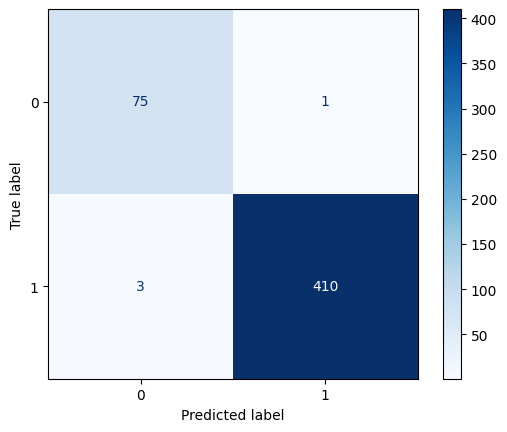

Classification Report:
               precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        76
   Malignant       1.00      0.99      1.00       413

    accuracy                           0.99       489
   macro avg       0.98      0.99      0.98       489
weighted avg       0.99      0.99      0.99       489



In [14]:
# Testing the model with detailed metrics
def evaluate_model_with_metrics(model, test_loader, criterion, device):
    model.eval()
    test_loss = 0.0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    test_loss /= len(test_loader.dataset)
    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
    precision = precision_score(all_labels, all_preds, average='binary')
    recall = recall_score(all_labels, all_preds, average='binary')
    f1 = f1_score(all_labels, all_preds, average='binary')
    cm = confusion_matrix(all_labels, all_preds)

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1 Score: {f1:.4f}")

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Print classification report
    class_report = classification_report(all_labels, all_preds, target_names=['Benign', 'Malignant'])
    print("Classification Report:\n", class_report)

    return test_loss, accuracy, precision, recall, f1, cm, class_report

# Evaluate on the test dataset
test_loss, test_accuracy, test_precision, test_recall, test_f1, cm, class_report = evaluate_model_with_metrics(model, test_loader, criterion, device)



Length mismatch: train_accuracies (5) vs val_accuracies (0)


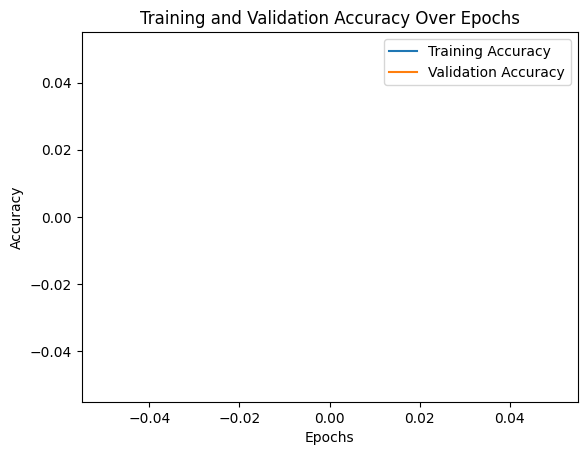

In [18]:

# Ensure that train_accuracies and val_accuracies have the same length
if len(train_accuracies) == len(val_accuracies):
    plt.figure()
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
    plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy Over Epochs')
    plt.show()
else:
    print(f"Length mismatch: train_accuracies ({len(train_accuracies)}) vs val_accuracies ({len(val_accuracies)})")
# Example: if you are using an early stopping criterion, you might want to truncate the lists accordingly.
min_length = min(len(train_accuracies), len(val_accuracies))
train_accuracies = train_accuracies[:min_length]
val_accuracies = val_accuracies[:min_length]

plt.figure()
plt.plot(range(1, min_length + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, min_length + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.show()
